In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Lotka-Volterra system

## 1.1.  Euler's method

In [2]:
# x, y - the initial values of the variables (x, y)
# a, b, c, d - values for alpha, beta, gamma and sigma respectively
# step - dt (step size for derivation)
# n - the number of iterations to integrate
def calculate_LotkaVolterra(x, y, a, b, c, d):
    X = x * (a - b * y)
    Y = y * (-c + d * x)
    return X, Y

# Euler's method
def integrate_LotkaVolterra(x, y, a, b, c, d, step, time):
    X = []
    Y = []
    current_x, current_y = x, y
    current_time = 0
    
    while current_time < time:
        X.append(current_x)
        Y.append(current_y)
        
        eq_x, eq_y = calculate_LotkaVolterra(current_x, current_y, a, b, c, d)
        current_x += eq_x * step
        current_y += eq_y * step
        
        current_time += step
    
    return X, Y

# Function to plot for different steps and a given solver function
def plot(steps, solver):
    fig, axs = plt.subplots(len(steps), 4, figsize=(4*4,4*len(steps)))
    fig.subplots_adjust(hspace=0.5)
    
    for i, dt in enumerate(steps):
        T = np.arange(start=0, stop=500+dt, step=dt)
        X, Y = solver(x=10, y=10, 
                      a=0.1, b=0.02, c=0.4, d=0.02, 
                      step=dt, time=500)
        
        axs[i, 0].set_title('dt={}'.format(dt))
        axs[i, 1].set_title('dt={}'.format(dt))
        axs[i, 2].set_title('dt={}'.format(dt))
        axs[i, 3].set_title('dt={}'.format(dt))
        
        axs[i, 0].set_xlabel('X')
        axs[i, 0].set_ylabel('Y')
        axs[i, 1].set_xlabel('T')
        axs[i, 1].set_ylabel('X')
        axs[i, 2].set_xlabel('T')
        axs[i, 2].set_ylabel('Y')
        axs[i, 3].set_xlabel('T')
        axs[i, 3].set_ylabel('X(blue) / Y(orange)')

        axs[i, 0].plot(X, Y);
        axs[i, 1].plot(T[:len(X)], X);
        axs[i, 2].plot(T[:len(Y)], Y);
        axs[i, 3].plot(T[:len(X)], X);
        axs[i, 3].plot(T[:len(Y)], Y);

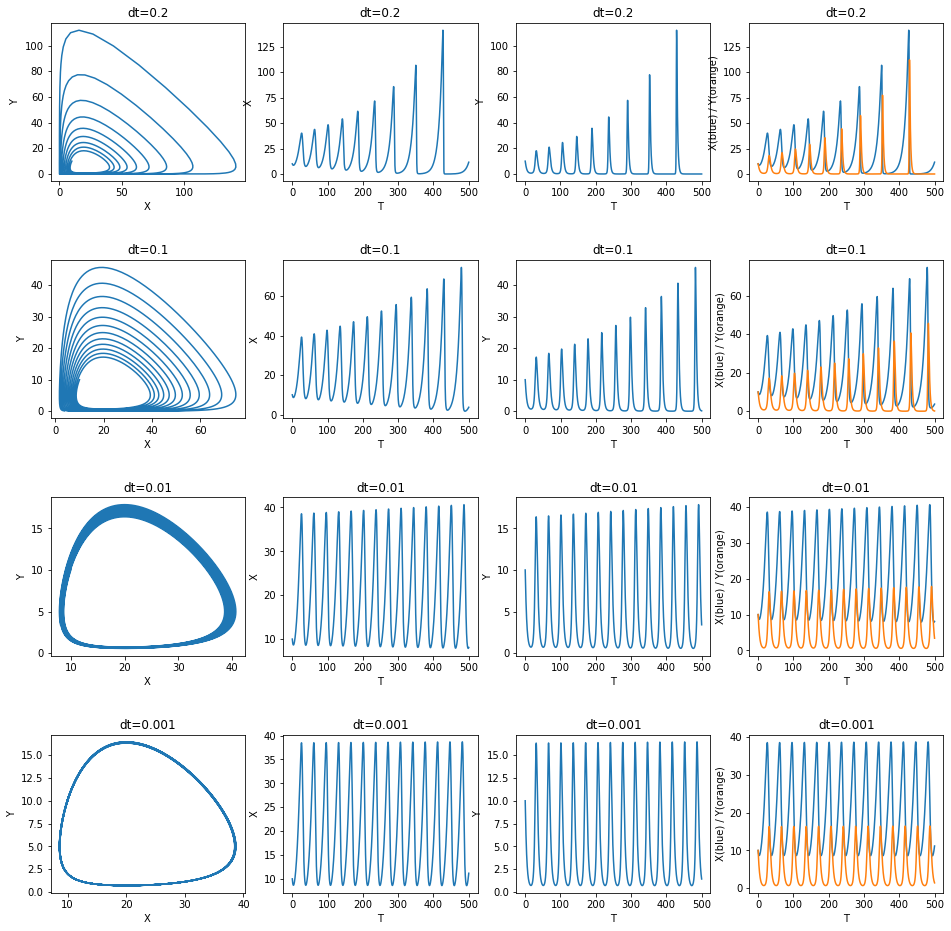

In [3]:
plot(steps=[0.2, 0.1, 0.01, 0.001], solver=integrate_LotkaVolterra)

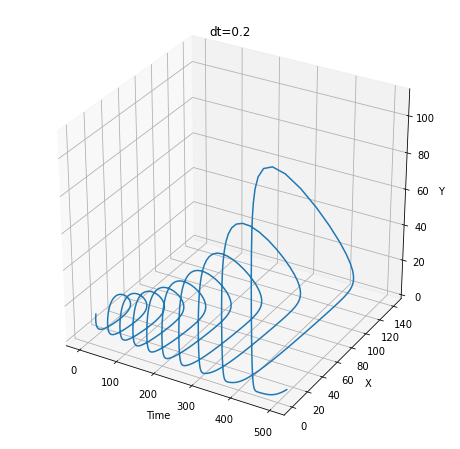

In [4]:
T = np.arange(start=0, stop=500+0.2, step=0.2)
X, Y = integrate_LotkaVolterra(x=10, y=10, 
                               a=0.1, b=0.02, c=0.4, d=0.02, 
                               step=0.2, time=500)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_title('dt=0.2')

ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.plot(T, X, Y);

## 1.2. Heun's method

In [5]:
def integrate_LotkaVolterra2(x, y, a, b, c, d, step, time):
    X = []
    Y = []
    current_x, current_y = x, y
    current_time = 0
    
    while current_time < time:
        X.append(current_x)
        Y.append(current_y)
        
        eq_x, eq_y = calculate_LotkaVolterra(current_x, current_y, a, b, c, d)
        eq_x2, tmp = calculate_LotkaVolterra(current_x + step * eq_x, current_y + step, a, b, c, d)
        tmp, eq_y2 = calculate_LotkaVolterra(current_x + step, current_y + step * eq_y, a, b, c, d)
        
        current_x += step/2 * (eq_x + eq_x2)
        current_y += step/2 * (eq_y + eq_y2)
        current_time += step
    
    return X, Y

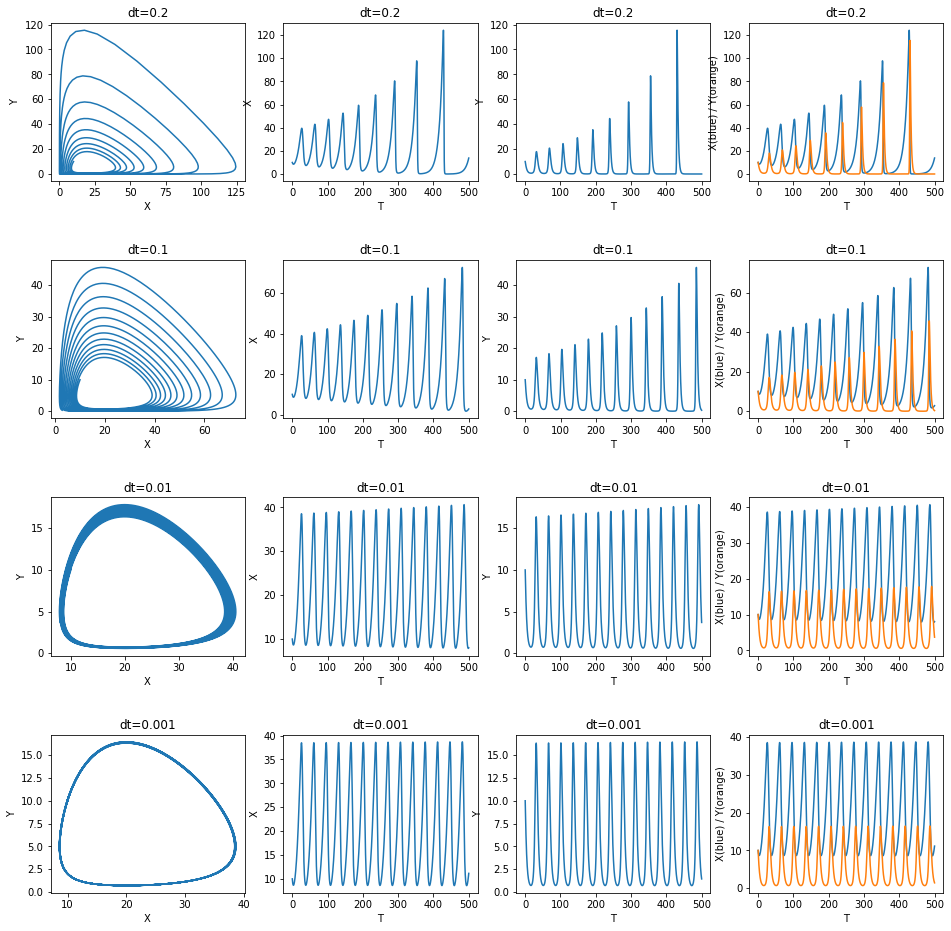

In [6]:
plot(steps=[0.2, 0.1, 0.01, 0.001], solver=integrate_LotkaVolterra2)

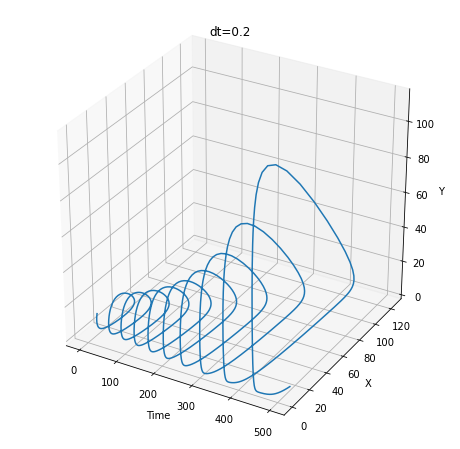

In [7]:
T = np.arange(start=0, stop=500+0.2, step=0.2)
X, Y = integrate_LotkaVolterra2(x=10, y=10, 
                                a=0.1, b=0.02, c=0.4, d=0.02, 
                                step=0.2, time=500)

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_title('dt=0.2')

ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.plot(T, X, Y);

---

# 2. Lorenz system

In [8]:
# a, b, c - sigma, rho and beta substitutions
def integrate_Lorenz(x, y, z, a, b, c, step, time):
    X = []
    Y = []
    Z = []
    current_x, current_y, current_z = x, y, z
    current_time = 0
    
    while current_time < time:
        X.append(current_x)
        Y.append(current_y)
        Z.append(current_z)
        
        current_x += a * (Y[-1] - X[-1]) * step
        current_y += (X[-1] * (b - Z[-1]) - Y[-1]) * step
        current_z += (X[-1] * Y[-1] - c * Z[-1]) * step
        
        current_time += step
    
    return X, Y, Z

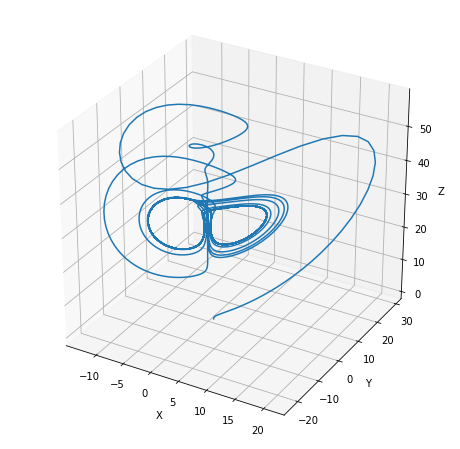

In [11]:
X, Y, Z = integrate_Lorenz(x=1, y=0, z=-1, 
                           a=10, b=28, c=3/8, 
                           step=0.01, time=100)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(X, Y, Z);

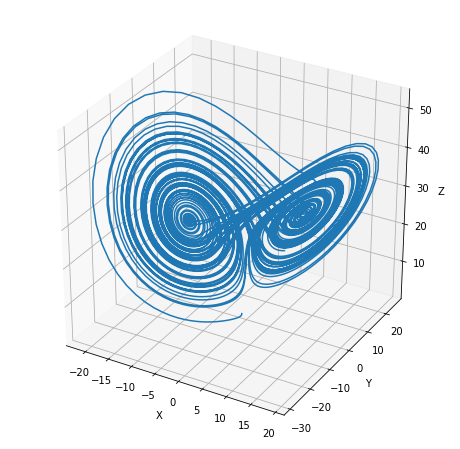

In [12]:
X, Y, Z = integrate_Lorenz(x=-1, y=0.001, z=1, 
                           a=10, b=28, c=8/3, 
                           step=0.01, time=100)
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot(X, Y, Z);